In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [78]:
DFproject = pd.read_csv('resultphyschem.csv')
show(DFproject)

In [79]:
show(DFproject['CharacteristicName'].value_counts())

- Each sample is tested for only one specific chemical
- Most samples are taken from the Gulf of Mexico
- Analyzing the three most tested chemicals in the dataset. Based on these concentrations, trying to dive deeper and think about how this affects marine life, and how this may impact humans like through bioaccumulation and recreational activities.
- Should we do three separate analysis for each chemical, or go in depth with just one?

- Organic carbon: Most samples tested for organic carbon. Compare ppm concentration across the Gulf of Mexico. High carbon levels can lead to ocean acidification. Based on this, see if it correlates with fish/animal populations, especially shellfish. Try to find pH data to see if the data agrees, if carbon ppm is low but pH is acidic, then maybe something else is causing the acidification.
- 2,3,3',4,5'-Pentachlorobiphenyl: Samples of pentachlorobiphenyl were taken around San Diego/Mexico. It is a manmade chemical used as an oil additive and in building materials. So we could find something like fishing or recreational data to show the frequency of human activity in/near these sample sites. Or the abundance of wildlife in/near these sample sites. 
- Phosphated pesticides: These samples were collected along the coast in Massachusetts. Phosphorus can lead to algae blooms, so we could find algae data and compare it to the sites in Massachusetts. We could compare marine life population with other nearby sites, or see if this has an impact on fishing activity

In [81]:
maskphos = (DFproject['CharacteristicName'] == 'Phosphated pesticides')
DFphos = DFproject[maskphos]
show(DFphos)

In [82]:
show(DFphos['MonitoringLocationName'].value_counts())

In [83]:
DFpH = pd.read_csv('pH.csv')
show(DFpH)

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5528/3422650483.py:1: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



In [84]:
DFcysts = pd.read_csv('cysts.csv')
show(DFcysts)

In [85]:
DFcysts.shape
# There are 185 observations, meaning 185 samples were taken 

(185, 9)

In [86]:
DFcysts.groupby(by=['CRUISE']).count()
# 48 samples were taken for cruise HLY1801 (Healy1801). 
# 26 samples were taken for cruise HLY1803 (Healy1803).
# 56 samples were taken for cruise HLY1901 (Healy1901).
# 17 samples were taken for cruise NBS2019 (North Bering Sea 2019).
# 38 samples were taken for cruise OS19-01 (Arctic Integrated Ecosystem Survey 2019).

,STATION_ID,LAYER_CM,DATE,LAT,LON,ALEXANDRIUM_CYSTS_CC,PDALEI_CYSTS_CC,SCRIPPS_CYSTS_CC
CRUISE,,,,,,,,
HLY1801,48,48,48,48,48,48,20,20
HLY1803,26,26,26,26,26,26,25,25
HLY1901,56,56,56,56,56,56,0,0
NBS2019,17,17,17,17,17,17,0,0
OS19-01,38,38,38,38,38,38,0,0


In [87]:
DFcysts['ALEXANDRIUM_CYSTS_CC'].describe()
# The minimum observed concentration of the alexandrium species was 0. The maximum observed concentration was 17602 cysts per cubic cm.
# All 185 samples were tested for the alexandrium species

count      185.000000
mean       886.248649
std       2311.572506
min          0.000000
25%         36.000000
50%        209.000000
75%        621.000000
max      17602.000000
Name: ALEXANDRIUM_CYSTS_CC, dtype: float64

In [88]:
show(DFcysts['CRUISE'].value_counts())

In [89]:
columnsAlex = ['LAT','LON','ALEXANDRIUM_CYSTS_CC','DATE','STATION_ID']
DFAlex = DFcysts[columnsAlex]
show(DFAlex)

In [90]:
DFAlex['ALEXANDRIUM_CYSTS_CC'].describe()

count      185.000000
mean       886.248649
std       2311.572506
min          0.000000
25%         36.000000
50%        209.000000
75%        621.000000
max      17602.000000
Name: ALEXANDRIUM_CYSTS_CC, dtype: float64

In [91]:
list(DFAlex['DATE'].value_counts().keys())

['2018-08-17',
 '2019-08-10',
 '2018-08-15',
 '2019-08-08',
 '2019-08-11',
 '2019-08-17',
 '2019-08-15',
 '2018-08-10',
 '2019-08-06',
 '2018-11-14',
 '2018-08-13',
 '2018-08-09',
 '2019-09-22',
 '2018-11-02',
 '2019-09-07',
 '2018-08-14',
 '2018-11-04',
 '2019-09-10',
 '2019-08-22',
 '2019-08-16',
 '2019-09-09',
 '2019-08-19',
 '2019-09-24',
 '2019-09-06',
 '2018-11-07',
 '2019-09-15',
 '2019-08-20',
 '2018-11-05',
 '2018-11-15',
 '2019-08-09',
 '2019-08-12',
 '2018-08-23',
 '2018-10-30',
 '2018-08-11',
 '2018-08-12',
 '2019-09-20',
 '2019-09-19',
 '2019-09-18',
 '2019-09-17',
 '2019-09-12',
 '2019-09-13',
 '2018-08-22',
 '2019-09-08',
 '2019-09-05',
 '2019-09-04',
 '2019-09-03',
 '2019-09-02',
 '2019-08-30',
 '2019-09-14',
 '2018-08-08',
 '2019-09-23',
 '2018-10-31',
 '2019-09-21',
 '2019-09-11',
 '2019-08-29',
 '2018-08-20',
 '2019-09-16']

In [92]:
DFAlex['year'] = DFAlex['DATE'].apply(lambda x: x.split('-')[0]) 
DFAlex

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5528/3248831956.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LAT,LON,ALEXANDRIUM_CYSTS_CC,DATE,STATION_ID,year
0,71.5357,-154.0313,1272,2019-08-20,BCE-1,2019
1,71.6498,-153.8398,14852,2019-08-20,BCE-3,2019
2,71.7815,-153.6300,2433,2019-08-20,BCE-5,2019
3,71.9082,-156.1932,515,2019-08-19,BCW-10,2019
4,72.1557,-155.8478,160,2019-08-19,BCW-6,2019
...,...,...,...,...,...,...
180,65.0024,-167.5010,5,2019-09-14,43,2019
181,65.3998,-167.9989,29,2019-09-15,44,2019
182,66.6004,-165.8325,19,2019-09-15,45,2019
183,66.5847,-167.0013,248,2019-09-15,46,2019


In [93]:
DFAlex['month'] = DFAlex['DATE'].apply(lambda x: x.split('-')[1]) 
DFAlex

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5528/1117707011.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LAT,LON,ALEXANDRIUM_CYSTS_CC,DATE,STATION_ID,year,month
0,71.5357,-154.0313,1272,2019-08-20,BCE-1,2019,08
1,71.6498,-153.8398,14852,2019-08-20,BCE-3,2019,08
2,71.7815,-153.6300,2433,2019-08-20,BCE-5,2019,08
3,71.9082,-156.1932,515,2019-08-19,BCW-10,2019,08
4,72.1557,-155.8478,160,2019-08-19,BCW-6,2019,08
...,...,...,...,...,...,...,...
180,65.0024,-167.5010,5,2019-09-14,43,2019,09
181,65.3998,-167.9989,29,2019-09-15,44,2019,09
182,66.6004,-165.8325,19,2019-09-15,45,2019,09
183,66.5847,-167.0013,248,2019-09-15,46,2019,09


In [94]:
DFAlex['day'] = DFAlex['DATE'].apply(lambda x: x.split('-')[2]) 
DFAlex

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5528/2054209540.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LAT,LON,ALEXANDRIUM_CYSTS_CC,DATE,STATION_ID,year,month,day
0,71.5357,-154.0313,1272,2019-08-20,BCE-1,2019,08,20
1,71.6498,-153.8398,14852,2019-08-20,BCE-3,2019,08,20
2,71.7815,-153.6300,2433,2019-08-20,BCE-5,2019,08,20
3,71.9082,-156.1932,515,2019-08-19,BCW-10,2019,08,19
4,72.1557,-155.8478,160,2019-08-19,BCW-6,2019,08,19
...,...,...,...,...,...,...,...,...
180,65.0024,-167.5010,5,2019-09-14,43,2019,09,14
181,65.3998,-167.9989,29,2019-09-15,44,2019,09,15
182,66.6004,-165.8325,19,2019-09-15,45,2019,09,15
183,66.5847,-167.0013,248,2019-09-15,46,2019,09,15


In [95]:
DFAlex['month'].value_counts()

month
08    107
09     52
11     22
10      4
Name: count, dtype: int64

In [96]:
maskaugust = (DFAlex['month']=='08') #masked just for the month of August because it is the month with the most samples
DFAlexaugust = DFAlex[maskaugust]
show(DFAlexaugust)

In [97]:
DFAlexaugust['year'] = DFAlexaugust['year'].apply(lambda x: int(x)) 
DFAlexaugust['day'] = DFAlexaugust['day'].apply(lambda x: int(x))
# changed the year and day to integers so they would be ordered in the histogram

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5528/3237090938.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_5528/3237090938.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
DFAlexaugust.dtypes 

LAT                     float64
LON                     float64
ALEXANDRIUM_CYSTS_CC      int64
DATE                     object
STATION_ID               object
year                      int64
month                    object
day                       int64
dtype: object

In [99]:
DFAlexaugust = DFAlexaugust.sort_values('year', ascending=True) #sorted the years so 2018 comes first, sorts it for the graph
show(DFAlexaugust)

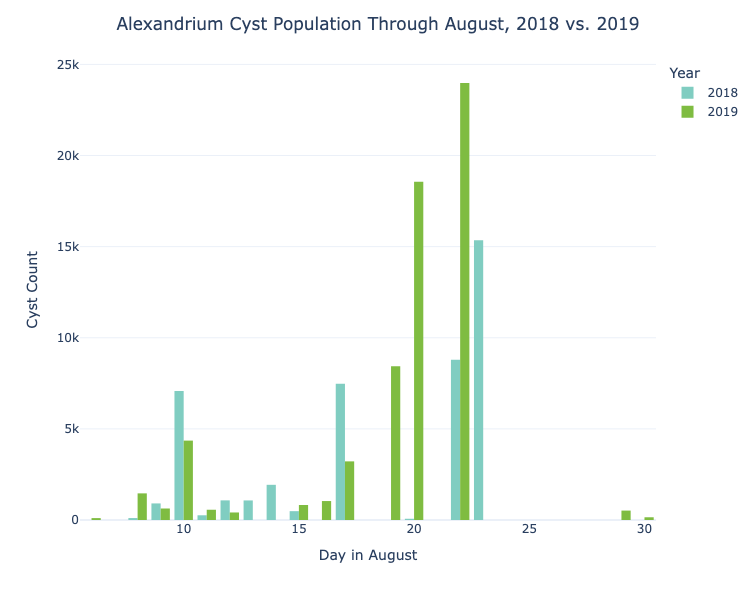

In [100]:
fig = px.histogram(DFAlexaugust, 
                   x="day",
                   y="ALEXANDRIUM_CYSTS_CC",
                   color='year',
                   color_discrete_map={2018: '#80cdc1', 
                                       2019:'#7fbc41'},
                   barmode = 'group',
                   nbins = 40,
             height=400)

fig.update_layout(
                  title='Alexandrium Cyst Population Through August, 2018 vs. 2019',
                  title_x=0.5,
                  yaxis_title="Cyst Count",
                  xaxis_title = 'Day in August',
                  legend_title='Year',
                  template = 'plotly_white',
                autosize=False,
                  width=800,
                  height=600)
fig.show()

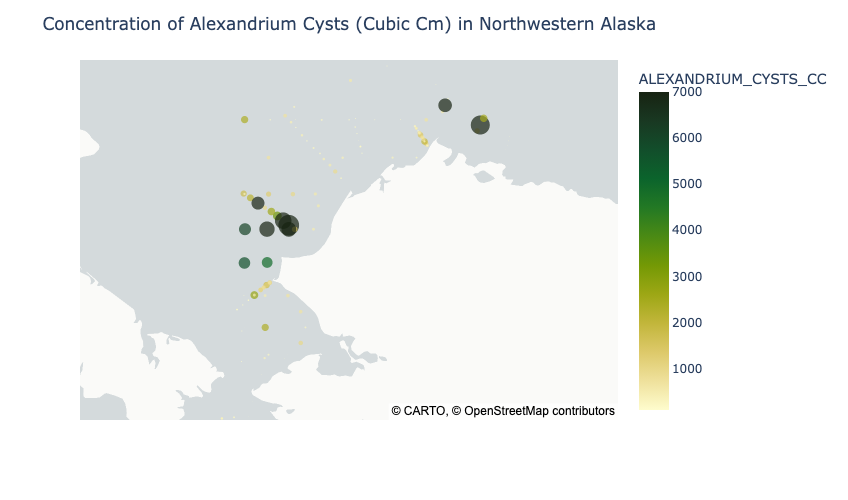

In [101]:
fig = px.scatter_map(DFAlex, 
                     lat="LAT", 
                     lon="LON",    
                     color="ALEXANDRIUM_CYSTS_CC", #colors based on the magnitude of number of cysts
                     size="ALEXANDRIUM_CYSTS_CC", #sets the size of a point based on the magnitude of number of cysts
                  color_continuous_scale= 'speed', #sets the color scheme
                     size_max=15, #sets the max size a point can get
                     zoom=3.5, #sets how zoomed in the map is
                     range_color=[100,7000], #anything below 100cc is light yellow, anything above 7000 is dark green, any values in between are a hue between light yellow and dark green
                     height=500)
fig.update_layout(map_style="light",
                 map_center_lon=-162, #sets the center of the map at longitude -162
                 title='Concentration of Alexandrium Cysts (Cubic Cm) in Northwestern Alaska')
fig.show()

In [102]:
# Another dataset to highlight the possible threat it poses to life
# marine life: find a dataset for animal population, shellfish abundance, salmon abundance
# humans: find a dataset for fisheries, human/fishing activity, PSP cases, human population in these areas, etc.

In [103]:
DFseafood = pd.read_csv('Total_wholesale.csv')
show(DFseafood)

In [104]:
DFseafood.dtypes

SpeciesGroup            object
SpeciesName             object
OperationYear            int64
AreaName                object
SpeciesCode              int64
CompanyCount_taxID       int64
TotalNetWeight           int64
TotalWholesaleValue      int64
WholesalePricePerlb    float64
dtype: object

In [105]:
maskyear = (DFseafood['OperationYear']>=2000) 
DFseafoodmasked = DFseafood[maskyear]
show(DFseafoodmasked)

In [106]:
# This dataset shows all observations in the years 2000+

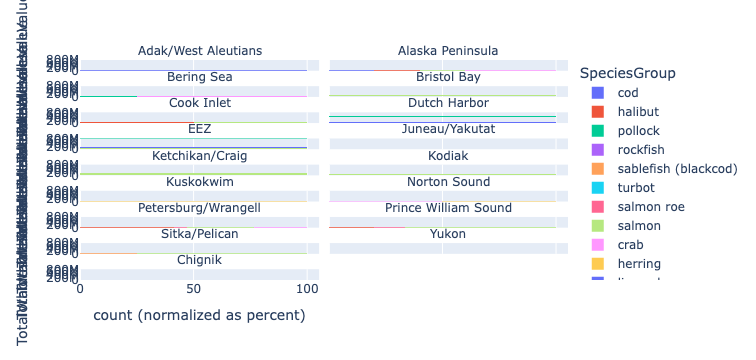

In [190]:
fig = px.histogram(DFseafoodmasked,
             y='TotalWholesaleValue',
                   barnorm = 'percent',
                   facet_col = 'AreaName',
                   facet_col_wrap = 2,
             color='SpeciesGroup')

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

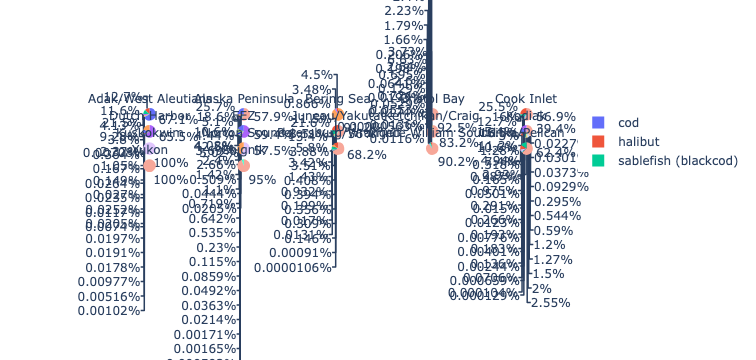

In [198]:
fig = px.pie(DFseafoodmasked, 
             values='TotalWholesaleValue', 
             names='SpeciesGroup', 
             facet_col = 'AreaName', 
             facet_col_wrap = 5)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

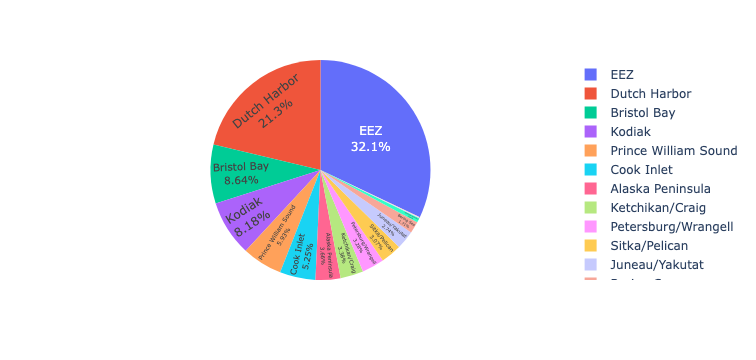

In [203]:
fig = px.pie(DFseafoodmasked, 
             values='TotalWholesaleValue', 
             names='AreaName')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()